# Linear Regression

Linear regression is a supervised learning technique used to describe and model the relationship between a scalar dependent variable Y and one or more independent/predictor variables X.

In linear regression, we use a weighted linear combination of the predictor variables to describe the relationship between them and Y. 

The weights w, are found by selecting a combination that minimises the total error between observed value Y and the value anticipated based on the model.


# Formulation

Given a set of input data $\ x\in\mathbb R^d $ and some output data $\ y\in\mathbb R $, we seek to learn a function that can map $ f : \mathbb R^d \rightarrow \mathbb R $ such that $ y \approx f(x;w)$ for the data pair $(x,y)$.

$f(x;w)$ is a regression function with free parameter $w$

We can model the relationship between the length $d$ vector of regressor variables $x$ and $y$ as $$ y_i = f(x;w) = w_{i0}1 + w_{i1}x_1 + w_{i2}x_2+ ... + w_{id}x_d + \epsilon_i = \mathbf x_i^Tw + \epsilon_i$$ where the error term $\epsilon_i$ is a random variabe that adds noise to the linear relationship between the dependent variable and regressors. Notice also that the first term $w_0$ is multiplied by a constant term 1, we call this term the intercept.

For a set of $n$ observations we can express the above using matrix notation as $ \mathbf y = \mathbf Xw + \varepsilon$, where: 

$$  \mathbf y = \begin{matrix} 
y_1 \\ y_2 \\ \vdots \\ y_n
   \end{matrix},
$$

and

$$  \mathbf x = \begin{matrix} 
\mathbf X_1^T \\ \mathbf X_2^T \\ \vdots \\ \mathbf X_n^T
   \end{matrix} = \begin{matrix} 1 & x_{11}^T & x_{12}^T & \cdots & x_{1d}^T \\
   1 & x_{21}^T & x_{22}^T & \cdots & x_{2d}^T \\
   \vdots & \vdots & \vdots & \cdots & \vdots \\
   1 & x_{n1}^T & x_{n2}^T & \cdots & x_{nd}^T \end{matrix},
$$

and

$$  \mathbf w = \begin{matrix} 
w_0 \\ w_1 \\ \vdots \\ w_d
   \end{matrix}, \varepsilon = \begin{matrix} 
\varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n
   \end{matrix}
$$

Clearly, a good model is one that makes predictions as close to the actual observed data as possible. More formally  we should aim to find the parameter vector $w_{ls}$ that minimises the difference between our estimates $\hat y = \mathbf Xw  $ and actual observed values $y$, rather than minimising the absolute differences we seek to find the $w_{ls} = $ that minimises the squared difference between  $\hat y$ the observed responses $y$.

Our 'Least Squares' solution is therefore the vector $ \mathbf w$ that minimises the following equation:

$$ L = \sum_i^{n}(y_i - x_i^Tw) = \lvert\lvert \mathbf y - \mathbf X^Tw \rvert\rvert ^2 =(\mathbf y - \mathbf X^Tw)^T(\mathbf y - \mathbf X^Tw) $$

We can find $ \mathbf w $ by setting:

$$ \nabla L = 2X^TXw - 2X^Ty = 0 $$

and in doing so we find that $$ w_{LS} = (X^TX)^{-1}X^Ty$$


We can now use our derived $w$ to make predictions on unseen data


In [1]:
# Code Example

In [88]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using the method above let's try estimate a fefeature vector for some data and then use our estimates to make predictions on some unseen data.

For this example we'll use the auto-mpg dataset from 1983. The data contains — as well as of other features — information about the fuel consumption of around 398 vehicles.

Let's load the data into using pandas and inspect it

In [89]:
names = ["mpg","cylinders","displacement","horsepower", "weight", "acceleration","model year","origin","name"]

df = pd.read_csv("auto-mpg.data",header=None, sep='\s+', names = names,converters={"origin":str})

Let's inspect the data - checking the distribution of the features as well as seein hw they correlate with miles per gallon

In [90]:
df.describe(include = "all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN,NaN


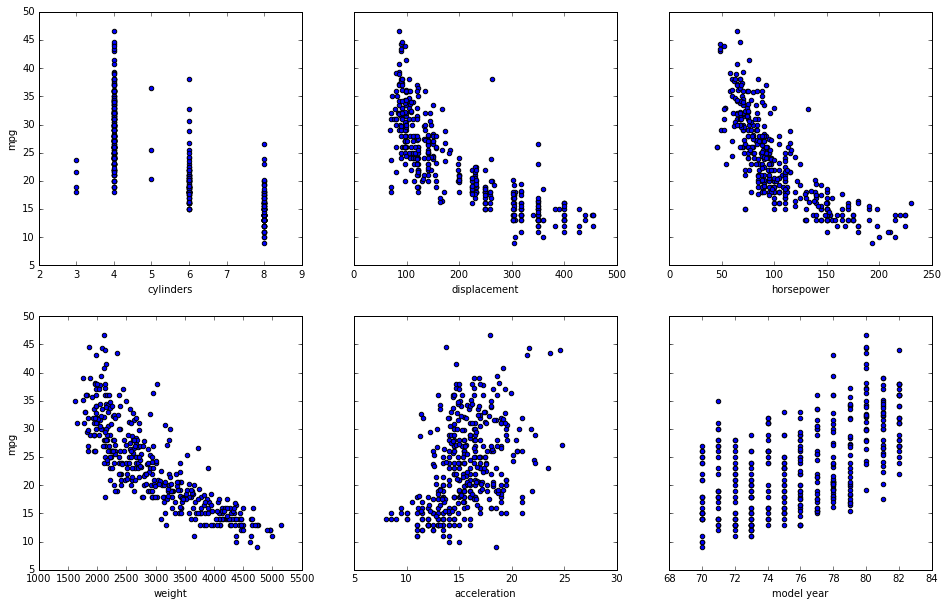

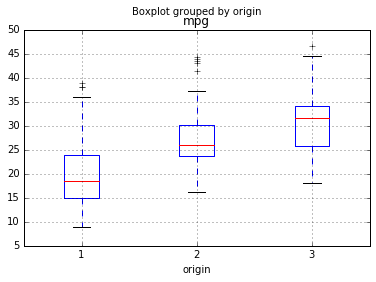

In [91]:
fig, axs = plt.subplots(2, 3, sharey=True)
df.plot(kind='scatter', x='cylinders', y='mpg', ax=axs[0,0], figsize=(16, 10))
df.plot(kind='scatter', x='displacement', y='mpg', ax=axs[0,1])
df.plot(kind='scatter', x='horsepower', y='mpg', ax=axs[0,2])
df.plot(kind='scatter', x='weight', y='mpg', ax=axs[1,0])
df.plot(kind='scatter', x='acceleration', y='mpg', ax=axs[1,1])
df.plot(kind='scatter', x='model year', y='mpg', ax=axs[1,2])


df.boxplot(column='mpg', by='origin')


Before we begin to solve for $w$, it appears that the 

In [92]:
#change model year to years since 1970 
df["model year"] = df["model year"] - 70

df["intercept"] = 1

#feature_cols = ["intercept","cylinders","displacement","horsepower", "weight", "acceleration","model year","origin"]

#For now let's only use the numeric features in our model

feature_cols = ["intercept","cylinders","displacement","horsepower", "weight","acceleration","model year"]

#Split data into training and test sets
msk = np.random.rand(len(df)) < 0.8

X_train = df[feature_cols][msk].as_matrix()

X_test = df[feature_cols][~msk].as_matrix()

y_train = df["mpg"][msk].as_matrix()

y_test = df["mpg"][~msk].as_matrix()

In [93]:
#Estimate feature vector as (XTX)^-1 XTy

w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T.dot(y_train))

In [94]:

print "Model Coefficients:\n"
for i in range(len(w)):
    
    print "{0} -\t{1}".format(feature_cols[i],w[i])

Model Coefficients:

intercept -	38.1541838039
cylinders -	-0.522576290291
displacement -	0.00804465356592
horsepower -	-0.0026786736551
weight -	-0.00622588013669
acceleration -	0.0667814789206
model year -	0.689267254216


# Interpreting the model coefficients

Displacement, horsepower, acceleration and model year all seem to have a postivie effect on miles per gallon whereas the other features appear to effect negatively.

We can get a sense of how well our 

In [95]:
# Calculate mean squared error and r_squared between our estimates and actual observed values
mse = np.square(X_train.dot(w) - y_train).sum() / len(y_train)

print "Root Mean Square Error Train - {0}".format(np.sqrt(mse))

Root Mean Square Error Train - 3.14973318027


In [96]:
# Calculate mean squared error between our estimates and actual observed values
mse = np.square(X_test.dot(w) - y_test).sum() / len(y_test)

print "Root Mean Square Error Test - {0}".format(np.sqrt(mse))

Root Mean Square Error Test - 4.31731854284


We've achived a similar average error on our test set and training our training sets, which could suggest that our data generalises well to unseen data but may also be down to random chance. 

We could 

# Polynomial Regression

Polynomial regression, is a form of linear regression that seeks to model a non-linear relationship between one or more predictor variables and a dependent variable.

Although polynomial regression fits a nonlinear model to the data, it is still regarded as a form of linear regression, as the output of our regression function $f$ is still just a linear combination of the feature vector $w$.

From the correlation plots above it seems like there may be a non-linear relationsip between mpg and displacement,horsepower and weight respectively. Let's try to model this by including 2nd order polynomial terms for them. 

In [97]:
square_list = ["weight","horsepower","displacement"]

for term in square_list:
    
    df["{0}_squared".format(term)] = (df[term] - df[term].mean()) * (df[term] - df[term].mean())

cols = feature_cols+["weight_squared","horsepower_squared","displacement_squared"]
    
X_train = df[cols][msk].as_matrix()

X_test = df[cols][~msk].as_matrix()

y_train = df["mpg"][msk].as_matrix()

y_test = df["mpg"][~msk].as_matrix()

In [98]:
#Estimate feature vector as (XTX)^-1 XTy

w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T.dot(y_train))

In [99]:
#Estimate feature vector as (XTX)^-1 XTy

w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T.dot(y_train))

print "Model Coefficients:\n"
for i in range(len(w)):
    
    print "{0} -\t{1}".format(cols[i],w[i])

Model Coefficients:

intercept -	41.5262261297
cylinders -	0.354387910094
displacement -	-0.0162025479368
horsepower -	-0.0776539497071
weight -	-0.00421186783497
acceleration -	-0.193522415693
model year -	0.712314643128
weight_squared -	1.23843192461e-06
horsepower_squared -	0.000512084272547
displacement_squared -	6.29742025722e-05


In [100]:
mse = np.square(X_train.dot(w) - y_train).sum() / len(y_train)

print "Root Mean Square Error Train - {0}".format(np.sqrt(mse))

Root Mean Square Error Train - 2.58824760482


In [101]:
mse = np.square(X_test.dot(w) - y_test).sum() / len(y_test)

print "Root Mean Square Error Test - {0}".format(np.sqrt(mse))

Root Mean Square Error Test - 3.83511689219


By including polynomial terms to the model, we've managed to bring the RMSE down on both the test and training set.